# Power Plants

* **Data:** `powerplants.csv`
* **Columns of interest:**
    * `Plant_Name` is the name of the power plant
    * `Utility_Na` is the name of the owner of the power plant
    * `City`, `County`, `StateName`, `Zip`
    * `PrimSource` is what kind of energy source it uses (nuclear, coal, etc)
    * `Total_MW` is the total amount of energy produces

## Read in the data

In [11]:
import pandas as pd
df = pd.read_csv("powerplants.csv")
df

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,Alabama,35476,19001 Lock 17 Road,...,0.0,0.0,NaN,0.0,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201801,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,Alabama,36512,North Highway 43,...,0.0,0.0,NaN,0.0,"Coal = 1100.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201801,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,Alabama,36092,750 Bouldin Dam Road,...,0.0,0.0,NaN,0.0,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201801,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,Alabama,35903,1000 Goodyear Ave,...,0.0,0.0,NaN,0.0,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201801,34.012800,-85.970800
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,Alabama,35580,460 Gorgas Road,...,0.0,0.0,NaN,0.0,Coal = 1053.7 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201801,33.644344,-87.196486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,61658,"Cougar Solar, LLC","Cougar Solar, LLC",61269,IPP Non-CHP,NaN,NaN,North Carolina,0,NaN,...,1.9,0.0,NaN,0.0,Solar = 1.9 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201801,35.462405,-79.180654
8612,61668,"Creston Ridge II, LLC","Creston Ridge II, LLC",61280,IPP Non-CHP,NaN,NaN,Nebraska,0,NaN,...,0.0,6.9,NaN,0.0,Wind = 6.9 MW,Onshore Wind Turbine,"EIA-860, EIA-860M and EIA-923",201801,41.677000,-97.391000
8613,61670,RJC II Community Solar Garden,RJC II CSG LLC,61285,IPP Non-CHP,NaN,NaN,Minnesota,0,NaN,...,1.0,0.0,NaN,0.0,Solar = 1 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201801,44.138851,-93.257152
8614,61671,Betcher Community Solar Garden,Betcher CSG LLC,61256,IPP Non-CHP,NaN,NaN,Minnesota,0,NaN,...,1.0,0.0,NaN,0.0,Solar = 1 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201801,44.392415,-92.595952


## What are the different types of energy sources in this dataset?

In [13]:
df.columns

Index(['Plant_Code', 'Plant_Name', 'Utility_Na', 'Utility_ID', 'sector_nam',
       'City', 'County', 'StateName', 'Zip', 'Street_Add', 'PrimSource',
       'Install_MW', 'Total_MW', 'Coal_MW', 'NG_MW', 'Crude_MW', 'Bio_MW',
       'Hydro_MW', 'HydroPS_MW', 'Nuclear_MW', 'Solar_MW', 'Wind_MW', 'Geo_MW',
       'Other_MW', 'source_des', 'tech_desc', 'Source', 'Period', 'Latitude',
       'Longitude'],
      dtype='object')

In [14]:
df.PrimSource.value_counts()

solar             2255
natural gas       1701
hydroelectric     1410
wind              1043
petroleum          842
biomass            726
coal               337
other              140
geothermal          66
nuclear             61
pumped storage      35
Name: PrimSource, dtype: int64

## What is the most common type of power plant in the United States?

In [43]:
df.PrimSource.value_counts(ascending=True)

pumped storage      35
nuclear             61
geothermal          66
other              140
coal               337
biomass            726
petroleum          842
wind              1043
hydroelectric     1410
natural gas       1701
solar             2255
Name: PrimSource, dtype: int64

## Make a graph of it, with the longest bar on the top.

<AxesSubplot:>

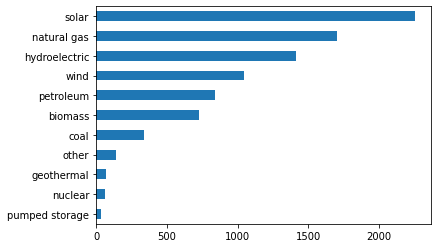

In [46]:
df.PrimSource.value_counts(ascending=True).plot(kind='barh')

## What type of power plant produces the most energy in the United States?

In [53]:
df.groupby(by = 'PrimSource').Total_MW.sum().sort_values()

PrimSource
geothermal          2541.0
other               3882.5
biomass            14085.3
pumped storage     22864.5
solar              27384.1
petroleum          30739.2
hydroelectric      79906.2
wind               88450.1
nuclear           100883.2
coal              257599.1
natural gas       453886.8
Name: Total_MW, dtype: float64

## Make a graph of it, with the longest bar on the top.

<AxesSubplot:ylabel='PrimSource'>

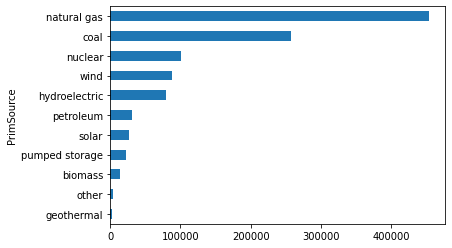

In [54]:
df.groupby(by = 'PrimSource').Total_MW.sum().sort_values().plot(kind='barh')

## What US state has the most power plants?

In [50]:
df.StateName.value_counts()

California        1344
North Carolina     626
Texas              431
New York           407
Minnesota          366
Massachusetts      350
New Jersey         263
Iowa               240
Michigan           231
Pennsylvania       215
Illinois           203
Wisconsin          189
Colorado           179
Oregon             173
Ohio               167
Florida            160
Georgia            159
Indiana            153
Virginia           150
Alaska             145
Kansas             139
Idaho              138
Washington         136
Arizona            129
Missouri           125
South Carolina     112
Oklahoma           108
Nebraska           104
Maine              104
New Mexico         102
Utah               101
Maryland            99
Connecticut         99
Vermont             93
Louisiana           82
Nevada              81
Alabama             76
Tennessee           66
Wyoming             63
New Hampshire       61
Montana             57
Arkansas            56
North Dakota        55
Hawaii     

## What three US states produce the most energy?

In [57]:
df.groupby(by = 'StateName').Total_MW.sum().sort_values().tail(3)

StateName
Florida        57987.4
California     76724.7
Texas         120730.5
Name: Total_MW, dtype: float64

## What state has the most coal power plants?

In [60]:
df[df.PrimSource == 'coal'].StateName.value_counts()

Illinois          21
Pennsylvania      21
Texas             18
Indiana           17
Iowa              15
Michigan          15
Ohio              14
Missouri          14
Minnesota         13
Wyoming           12
Kentucky          12
Nebraska          10
Wisconsin         10
West Virginia     10
North Carolina    10
Colorado           9
North Dakota       9
Virginia           8
Florida            8
Maryland           7
Tennessee          6
Utah               6
Oklahoma           6
South Carolina     6
Kansas             6
Arkansas           5
Montana            5
Georgia            5
Arizona            5
Alaska             5
New York           4
Louisiana          3
New Mexico         3
Alabama            3
Nevada             2
New Jersey         2
New Hampshire      2
Mississippi        2
South Dakota       1
Oregon             1
Washington         1
Delaware           1
Connecticut        1
Idaho              1
Hawaii             1
California         1
Name: StateName, dtype: int64

## What state produces the most energy using solar power?

In [64]:
df[df.PrimSource == 'solar'].groupby(by = 'StateName').Total_MW.sum().sort_values().tail()

StateName
Texas              1222.7
Nevada             1829.7
Arizona            2009.1
North Carolina     3254.1
California        10953.9
Name: Total_MW, dtype: float64

## List all of the nuclear powerplants in New York.

In [72]:
df_NY = df[df.StateName == 'New York']
df_NY[df.PrimSource == 'nuclear']

/var/folders/m2/hbrfwp7911s5ykfcv0bl3bcc0000gn/T/ipykernel_16066/2119079600.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_NY[df.PrimSource == 'nuclear']


,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
1155,2497,Indian Point 2,Entergy Nuclear Indian Point 2,6027,IPP Non-CHP,Buchanan,Westchester,New York,10511,Broadway & Bleakley Ave,...,0.0,0.0,NaN,0.0,Nuclear = 1000.4 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,41.270556,-73.952700
1213,2589,Nine Mile Point Nuclear Station,Exelon Nuclear,55951,IPP Non-CHP,Lycoming,Oswego,New York,13093,PO Box 63,...,0.0,0.0,NaN,0.0,Nuclear = 1916 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,43.521100,-76.410000
1861,6110,James A Fitzpatrick,Exelon Nuclear,55951,IPP Non-CHP,Lycoming,Oswego,New York,13093,Lake Road,...,0.0,0.0,NaN,0.0,Nuclear = 851 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,43.521390,-76.408394
1868,6122,R E Ginna Nuclear Power Plant,Exelon Nuclear,55951,IPP Non-CHP,Ontario,Wayne,New York,14519,Lake Rd.,...,0.0,0.0,NaN,0.0,Nuclear = 582 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,43.277700,-77.309900
2536,8907,Indian Point 3,Entergy Nuclear Indian Point 3,6028,IPP Non-CHP,Buchanan,Westchester,New York,10511,Broadway Bleakley Avenue,...,0.0,0.0,NaN,0.0,Nuclear = 1041.3 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201801,41.270600,-73.952600


## What is the most common type of powerplant in New Jersey?

In [76]:
df[df.StateName == 'New Jersey'].PrimSource.value_counts()


solar             183
natural gas        48
biomass            16
petroleum           4
nuclear             3
coal                2
hydroelectric       2
other               2
wind                2
pumped storage      1
Name: PrimSource, dtype: int64

## What type of power plant produces the most power in New Jersey?

In [84]:
df_NJ = df[df.StateName == 'New Jersey']
df_NJ.groupby(by = 'PrimSource').Total_MW.sum().sort_values()

PrimSource
wind                  7.6
hydroelectric        12.3
other                13.1
biomass             226.4
petroleum           334.0
pumped storage      420.0
coal                463.0
solar               638.5
nuclear            4146.3
natural gas       11556.3
Name: Total_MW, dtype: float64